In [1]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

# Configure Jupyter Notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', -1)
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))

reload(plt)
%matplotlib inline
%config InlineBackend.figure_format ='retina'

warnings.filterwarnings('ignore')

# configure plotly graph objects
pio.renderers.default = 'iframe'
# pio.renderers.default = 'vscode'

pio.templates["ck_template"] = go.layout.Template(
    layout_colorway = px.colors.sequential.Viridis,
#     layout_hovermode = 'closest',
#     layout_hoverdistance = -1,
    layout_autosize=False,
    layout_width=800,
    layout_height=600,
    layout_font = dict(family="Calibri Light"),
    layout_title_font = dict(family="Calibri"),
    layout_hoverlabel_font = dict(family="Calibri Light"),
#     plot_bgcolor="white",
)

# pio.templates.default = 'seaborn+ck_template+gridon'
pio.templates.default = 'ck_template+gridon'
# pio.templates.default = 'seaborn+gridon'
# pio.templates

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Cap2/random_training_set_50.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41166 entries, 0 to 41165
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 41166 non-null  int64  
 1   dur                41166 non-null  float64
 2   proto              41166 non-null  object 
 3   service            41166 non-null  object 
 4   state              41166 non-null  object 
 5   spkts              41166 non-null  int64  
 6   dpkts              41166 non-null  int64  
 7   sbytes             41166 non-null  int64  
 8   dbytes             41166 non-null  int64  
 9   rate               41166 non-null  float64
 10  sttl               41166 non-null  int64  
 11  dttl               41166 non-null  int64  
 12  sload              41166 non-null  float64
 13  dload              41166 non-null  float64
 14  sloss              41166 non-null  int64  
 15  dloss              41166 non-null  int64  
 16  sinpkt             411

In [4]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,38765,0.040302,tcp,-,FIN,24,22,2012,20966,1116.569871,29,31,3.829090e+05,3.972607e+06,2,7,1.752261,1.877667,4.042508,132.796890,255,3516814878,3515968559,255,0.000000,0.000000,0.000000,84,953,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,39158,0.000855,udp,dns,CON,2,2,130,162,3508.771966,31,29,6.081871e+05,7.578948e+05,0,0,0.002000,0.002000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,65,81,0,0,2,0,2,1,1,1,0,0,0,2,3,0,Normal,0
2,24922,0.001032,udp,dns,CON,2,2,130,162,2906.976908,31,29,5.038760e+05,6.279070e+05,0,0,0.011000,0.002000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,65,81,0,0,6,0,1,1,1,1,0,0,0,4,4,0,Normal,0
3,6373,1.066736,ospf,-,INT,42,0,1890,0,38.435002,254,0,1.383660e+04,0.000000e+00,0,0,26.017951,0.000000,30.409635,0.000000,0,0,0,0,0.000000,0.000000,0.000000,45,0,0,0,1,2,1,1,1,1,0,0,0,2,1,0,Exploits,1
4,28195,1.179328,tcp,http,FIN,14,18,1684,10168,26.286157,31,29,1.060943e+04,6.514897e+04,3,5,90.689075,69.342118,9070.600906,7941.967034,255,1247442435,1248378456,255,0.000630,0.000508,0.000122,120,565,1,3924,3,0,5,1,1,1,0,0,1,4,2,0,Normal,0
5,4489,0.000005,udp,-,INT,2,0,168,0,200000.005100,254,0,1.344000e+08,0.000000e+00,0,0,0.005000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,84,0,0,0,1,2,1,1,1,1,0,0,0,3,1,0,Reconnaissance,1
6,21137,0.000008,udp,dns,INT,2,0,114,0,125000.000300,254,0,5.700000e+07,0.000000e+00,0,0,0.008000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,17,2,17,17,17,17,0,0,0,17,17,0,Generic,1
7,39936,0.018275,tcp,-,FIN,16,18,1540,1644,1805.745539,31,29,6.321204e+05,6.798358e+05,4,4,1.196067,1.047294,72.054781,2.103111,255,574309990,2728757880,255,0.000592,0.000467,0.000125,96,91,0,0,11,0,7,6,1,6,0,0,0,8,7,0,Normal,0
8,41572,0.000010,udp,-,INT,2,0,104,0,100000.002500,254,0,4.160000e+07,0.000000e+00,0,0,0.010000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,2,2,1,1,1,2,0,0,0,1,4,0,Normal,0
9,24638,2.638715,tcp,-,FIN,122,126,7816,15876,93.606167,31,29,2.350235e+04,4.775052e+04,30,32,21.804801,21.105344,1668.353139,1644.708336,255,4044298670,1899989526,255,0.000683,0.000543,0.000140,64,126,0,0,7,0,5,1,1,2,0,0,0,3,5,0,Normal,0


In [5]:
df.describe(include='all')

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,41166.000000,41166.000000,41166,41166,41166,41166.000000,41166.000000,4.116600e+04,4.116600e+04,4.116600e+04,41166.000000,41166.000000,4.116600e+04,4.116600e+04,41166.000000,41166.000000,41166.000000,41166.000000,4.116600e+04,41166.000000,41166.000000,4.116600e+04,4.116600e+04,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,4.116600e+04,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166,41166.000000
unique,NaN,NaN,131,13,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,21507,23498,19638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18554,NaN
mean,41194.566341,0.999572,NaN,NaN,NaN,18.049555,17.672011,7.104101e+03,1.347644e+04,8.198686e+04,180.654278,95.285818,6.384132e+07,6.253955e+05,4.421343,6.405650,732.294318,110.493975,5.684951e+03,490.213374,133.215396,1.079397e+09,1.075396e+09,128.083491,0.055900,0.029337,0.026563,138.336929,116.416412,0.094738,1.425261e+03,9.548972,1.366783,5.732692,4.922387,3.663873,7.450056,0.008599,0.008745,0.127994,6.458194,9.172351,0.010737,NaN,0.549288
std,23730.934914,4.697748,NaN,NaN,NaN,115.993424,119.784307,1.467524e+05,1.575082e+05,1.466999e+05,101.606923,116.526939,1.771396e+08,2.372599e+06,55.260542,58.072326,6098.690097,1212.627436,5.153273e+04,2386.610800,127.369687,1.385652e+09,1.381445e+09,127.493786,0.118349,0.072385,0.056672,206.867281,245.217365,0.708240,2.876233e+04,11.075967,1.065098,8.374715,8.359261,5.900458,11.389197,0.092597,0.094402,0.634729,8.505412,11.110146,0.103063,NaN,0.497571
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,20643.250000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,2.861260e+01,62.000000,0.000000,1.126289e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,NaN,0.000000
50%,41099.500000,0.013893,NaN,NaN,NaN,6.000000,2.000000,5.340000e+02,1.780000e+02,2.690583e+03,254.000000,29.000000,5.804269e+05,2.113428e+03,1.000000,0.000000,0.544662,0.010000,1.752184e+01,0.000000,255.000000,2.487146e+07,2.265443e+07,255.000000,0.000000,0.000000,0.000000,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,NaN,1.000000
75%,61707.750000,0.719750,NaN,NaN,NaN,12.000000,10.000000,1.280000e+03,9.560000e+02,1.250000e+05,254.000000,252.000000,6.514286e+07,1.638178e+04,3.000000,2.000000,63.223722,62.973748,3.211519e+03,127.739916,255.000000,2.166147e+09,2.151922e+09,255.000000,0.104947,0.052087,0.048669,100.00000

In [6]:
list_drop = ['id','attack_cat']

In [7]:
df.drop(list_drop,axis=1,inplace=True)

In [8]:
# Clamp extreme Values
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,41166.000000,41166.000000,41166.000000,4.116600e+04,4.116600e+04,4.116600e+04,41166.000000,41166.000000,4.116600e+04,4.116600e+04,41166.000000,41166.000000,41166.000000,41166.000000,4.116600e+04,41166.000000,41166.000000,4.116600e+04,4.116600e+04,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,4.116600e+04,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000
mean,0.999572,18.049555,17.672011,7.104101e+03,1.347644e+04,8.198686e+04,180.654278,95.285818,6.384132e+07,6.253955e+05,4.421343,6.405650,732.294318,110.493975,5.684951e+03,490.213374,133.215396,1.079397e+09,1.075396e+09,128.083491,0.055900,0.029337,0.026563,138.336929,116.416412,0.094738,1.425261e+03,9.548972,1.366783,5.732692,4.922387,3.663873,7.450056,0.008599,0.008745,0.127994,6.458194,9.172351,0.010737,0.549288
std,4.697748,115.993424,119.784307,1.467524e+05,1.575082e+05,1.466999e+05,101.606923,116.526939,1.771396e+08,2.372599e+06,55.260542,58.072326,6098.690097,1212.627436,5.153273e+04,2386.610800,127.369687,1.385652e+09,1.381445e+09,127.493786,0.118349,0.072385,0.056672,206.867281,245.217365,0.708240,2.876233e+04,11.075967,1.065098,8.374715,8.359261,5.900458,11.389197,0.092597,0.094402,0.634729,8.505412,11.110146,0.103063,0.497571
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.861260e+01,62.000000,0.000000,1.126289e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.013893,6.000000,2.000000,5.340000e+02,1.780000e+02,2.690583e+03,254.000000,29.000000,5.804269e+05,2.113428e+03,1.000000,0.000000,0.544662,0.010000,1.752184e+01,0.000000,255.000000,2.487146e+07,2.265443e+07,255.000000,0.000000,0.000000,0.000000,65.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719750,12.000000,10.000000,1.280000e+03,9.560000e+02,1.250000e+05,254.000000,252.000000,6.514286e+07,1.638178e+04,3.000000,2.000000,63.223722,62.973748,3.211519e+03,127.739916,255.000000,2.166147e+09,2.151922e+09,255.000000,0.104947,0.052087,0.048669,100.000000,88.000000,0.000000,0.000000e+00,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,59.999989,10200.000000,11018.000000,1.367739e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,1.963350e+07,5096.000000,5507.000000,60009.992000,57739.240000,1.483831e+06,57739.232000,255.000000,4.294832e+09,4.294325e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1464.000000,131.000000,2.088918e+06,63.000000,6.000000,59.000000,59.000000,37.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [9]:
DEBUG =0

for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('max = '+str(df_numeric[feature].max()))
        print('75th = '+str(df_numeric[feature].quantile(0.95)))
        print('median = '+str(df_numeric[feature].median()))
        print(df_numeric[feature].max()>10*df_numeric[feature].median())
        print('----------------------------------------------------')
    if df_numeric[feature].max()>10*df_numeric[feature].median() and df_numeric[feature].max()>10 :
        df[feature] = np.where(df[feature]<df[feature].quantile(0.95), df[feature], df[feature].quantile(0.95))

In [10]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all')

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,4.116600e+04,4.116600e+04,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,4.116600e+04,4.116600e+04,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000,41166.000000
mean,0.444799,11.810669,9.192562,1568.652917,2874.507118,71589.928663,180.654278,95.285818,4.636931e+07,3.091890e+05,2.183671,2.550454,37.351884,33.654720,1913.859595,190.890497,133.215396,1.068621e+09,1.064717e+09,128.083491,0.055900,0.029337,0.026563,123.789244,100.156300,0.091046,9.289025,9.213259,1.366783,5.265000,4.466769,3.396905,7.107564,0.008599,0.008745,0.090997,5.973425,8.842346,0.010737,0.549288
std,0.672140,15.630840,14.538792,2933.662519,7535.212410,102398.936638,101.606923,116.526939,7.390431e+07,8.873365e+05,3.056877,4.780285,56.689229,51.718513,2891.840529,491.190659,127.369687,1.362615e+09,1.358576e+09,127.493786,0.118349,0.072385,0.056672,146.989782,183.881743,0.287678,34.617769,10.075528,1.065098,6.708843,6.678118,5.037110,10.323051,0.092597,0.094402,0.287609,6.856080,10.118617,0.103063,0.497571
min,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,114.000000,0.000000,28.612604,62.000000,0.000000,1.126289e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.013893,6.000000,2.000000,534.000000,178.000000,2690.582979,254.000000,29.000000,5.804269e+05,2.113428e+03,1.000000,0.000000,0.544662,0.010000,17.521839,0.000000,255.000000,2.487146e+07,2.265443e+07,255.000000,0.000000,0.000000,0.000000,65.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,0.719750,12.000000,10.000000,1280.000000,956.000000,125000.000300,254.000000,252.000000,6.514286e+07,1.638178e+04,3.000000,2.000000,63.223722,62.973748,3211.519260,127.739916,255.000000,2.166147e+09,2.151922e+09,255.000000,0.104947,0.052087,0.048669,100.000000,88.000000,0.000000,0.000000,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,2.396178,60.000000,54.000000,12472.000000,30622.000000,333333.321500,255.000000,253.000000,2.666667e+08,3.737056e+06,11.000000,18.000000,199.881411,165.940660,9530.500237,2093.031456,255.000000,3.867817e+09,3.861143e+09,255.000000,3.821465,3.226788,2.928778,638.000000,681.750000,1.000000,144.000000,36.000000,6.000000,25.000000,25.000000,18.000000,36.000000,2.000000,2.000000,1.000000,25.000000,36.000000,1.000000,1.000000


In [11]:
df_numeric = df.select_dtypes(include=[np.number])
df_before = df_numeric.copy()
DEBUG = 0
for feature in df_numeric.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_numeric[feature].nunique()))
        print(df_numeric[feature].nunique()>50)
        print('----------------------------------------------------')
    if df_numeric[feature].nunique()>50:
        if df_numeric[feature].min()==0:
            df[feature] = np.log(df[feature]+1)
        else:
            df[feature] = np.log(df[feature])

df_numeric = df.select_dtypes(include=[np.number])

In [12]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,41166,41166,41166
unique,131,13,5
top,tcp,-,FIN
freq,21507,23498,19638


In [13]:
DEBUG = 0
for feature in df_cat.columns:
    if DEBUG == 1:
        print(feature)
        print('nunique = '+str(df_cat[feature].nunique()))
        print(df_cat[feature].nunique()>6)
        print(sum(df[feature].isin(df[feature].value_counts().head().index)))
        print('----------------------------------------------------')

    if df_cat[feature].nunique()>6:
        df[feature] = np.where(df[feature].isin(df[feature].value_counts().head().index), df[feature], '-')

In [14]:
df_cat = df.select_dtypes(exclude=[np.number])
df_cat.describe(include='all')

,proto,service,state
count,41166,41166,41166
unique,6,5,5
top,tcp,-,FIN
freq,21507,24548,19638


In [15]:
df['proto'].value_counts().head().index

Index(['tcp', 'udp', '-', 'unas', 'arp'], dtype='object')

In [16]:
df['proto'].value_counts().index

Index(['tcp', 'udp', '-', 'unas', 'arp', 'ospf'], dtype='object')

In [17]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,4:-2]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top 20 Features",
                  height=1200,
                  showlegend=False,
                 )

fig.show()

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [19]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(41166, 42)

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [21]:
np.shape(X)

(41166, 55)

In [22]:
df_cat.describe(include='all')

,proto,service,state
count,41166,41166,41166
unique,6,5,5
top,tcp,-,FIN
freq,21507,24548,19638


In [23]:
X[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.95110556e-02, 3.17805383e+00, 2.20000000e+01, 7.60688453e+00,
       9.95070505e+00, 7.01891185e+00, 2.90000000e+01, 3.10000000e+01,
       1.28555553e+01, 1.51338090e+01, 2.00000000e+00, 7.00000000e+00,
       1.01242276e+00, 1.05697990e+00, 1.61790358e+00, 4.89632290e+00,
       2.55000000e+02, 2.19808216e+01, 2.19805809e+01, 2.55000000e+02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.43081680e+00,
       6.52612876e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 0.00000000e+00])

In [24]:
len(feature_names)

42

In [25]:
for label in list(df_cat['state'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['service'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

for label in list(df_cat['proto'].value_counts().index)[::-1][1:]:
    feature_names.insert(0,label)

In [26]:
len(feature_names)

55

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 0,
                                                    stratify=y)

In [28]:
df_cat.describe(include='all')

,proto,service,state
count,41166,41166,41166
unique,6,5,5
top,tcp,-,FIN
freq,21507,24548,19638


In [29]:
pip install --upgrade scikit-learn

In [30]:
# 6 + 5 + 6 unique = 17, therefore the first 17 rows will be the categories that have been encoded, start scaling from row 18 only.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 17:] = sc.fit_transform(X_train[:, 17:])
X_test[:, 17:] = sc.transform(X_test[:, 17:])

In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score','time to train','time to predict','total time'])

In [32]:
%%time
from sklearn.linear_model import LogisticRegression
start = time.time()
model = LogisticRegression().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 941 ms, sys: 223 ms, total: 1.16 s
Wall time: 1.86 s


In [33]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Logistic'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 92.47%
Recall: 92.47%
Precision: 92.48%
F1-Score: 92.47%
time to train: 1.86 s
time to predict: 0.01 s
total: 1.86 s


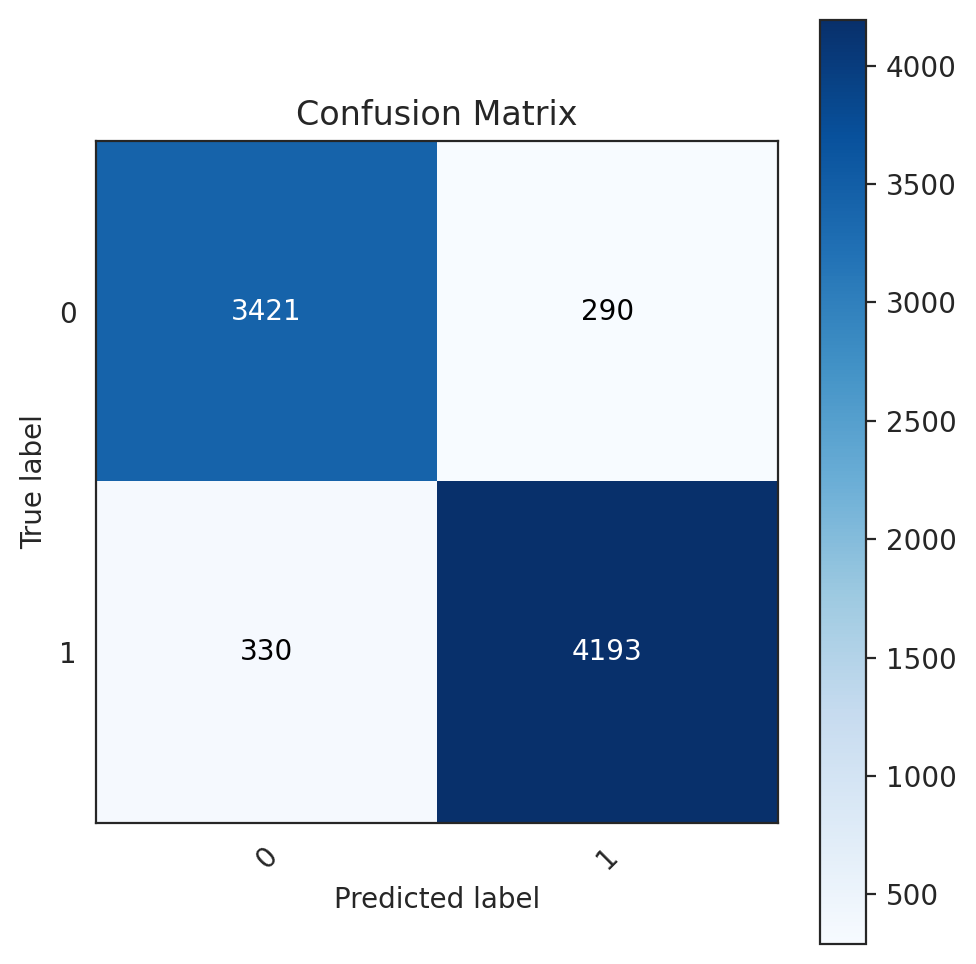

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


In [35]:
%%time
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
model = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 2.12 s, sys: 22.6 ms, total: 2.14 s
Wall time: 2.26 s


In [36]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['kNN'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 94.56%
Recall: 94.56%
Precision: 94.60%
F1-Score: 94.56%
time to train: 0.01 s
time to predict: 2.25 s
total: 2.26 s


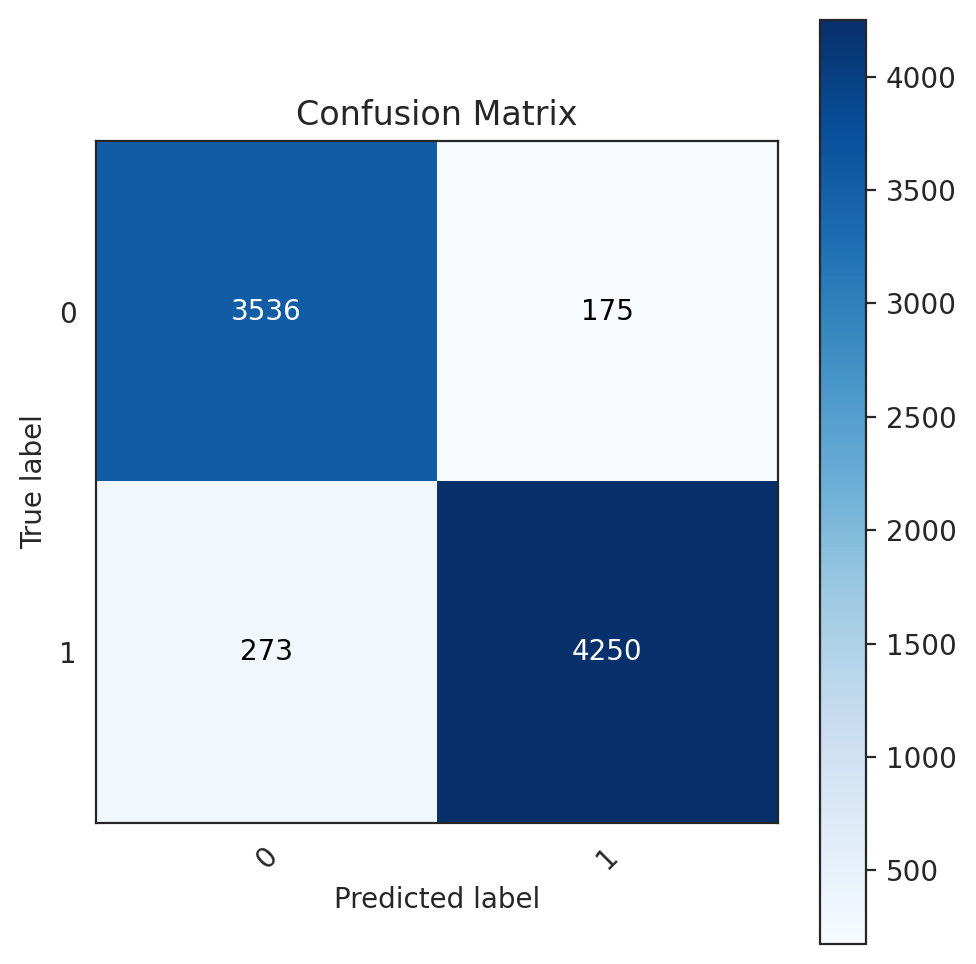

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


In [38]:
%%time
from sklearn.tree import DecisionTreeClassifier
start = time.time()
model = DecisionTreeClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 641 ms, sys: 1.54 ms, total: 642 ms
Wall time: 653 ms


In [39]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Decision Tree'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 96.28%
Recall: 96.28%
Precision: 96.29%
F1-Score: 96.28%
time to train: 0.63 s
time to predict: 0.00 s
total: 0.64 s


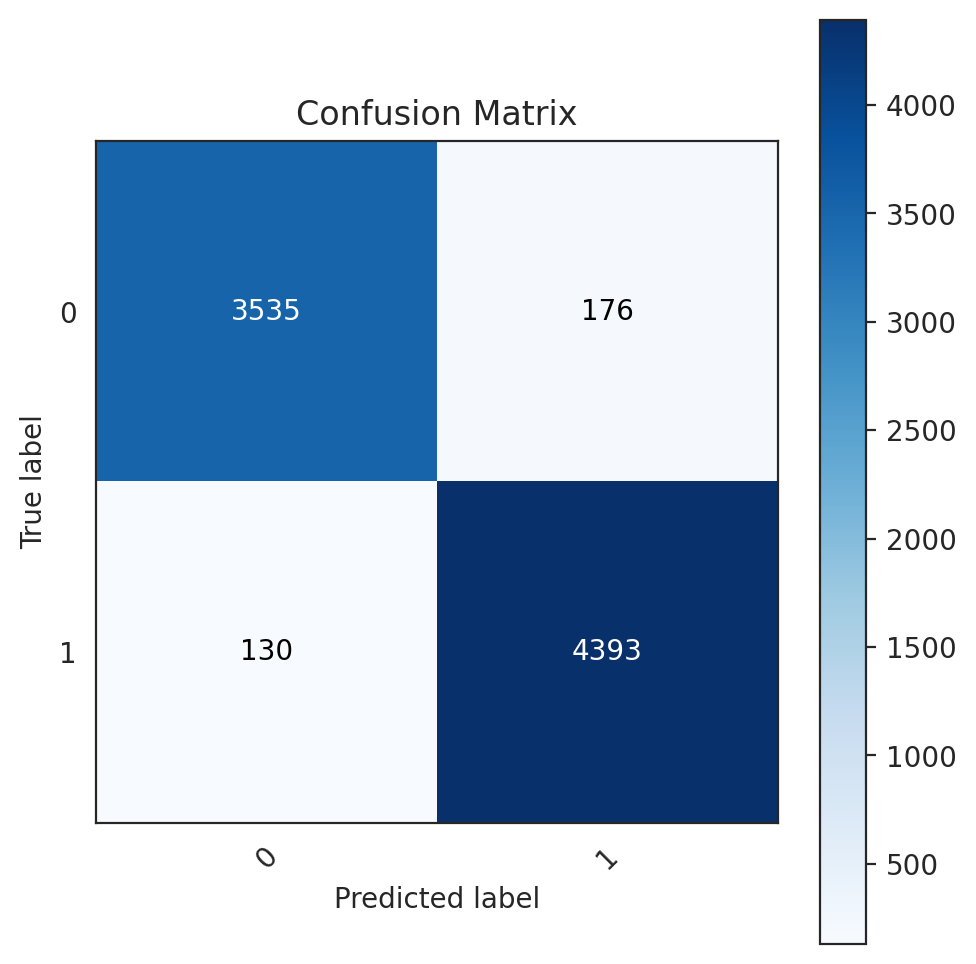

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


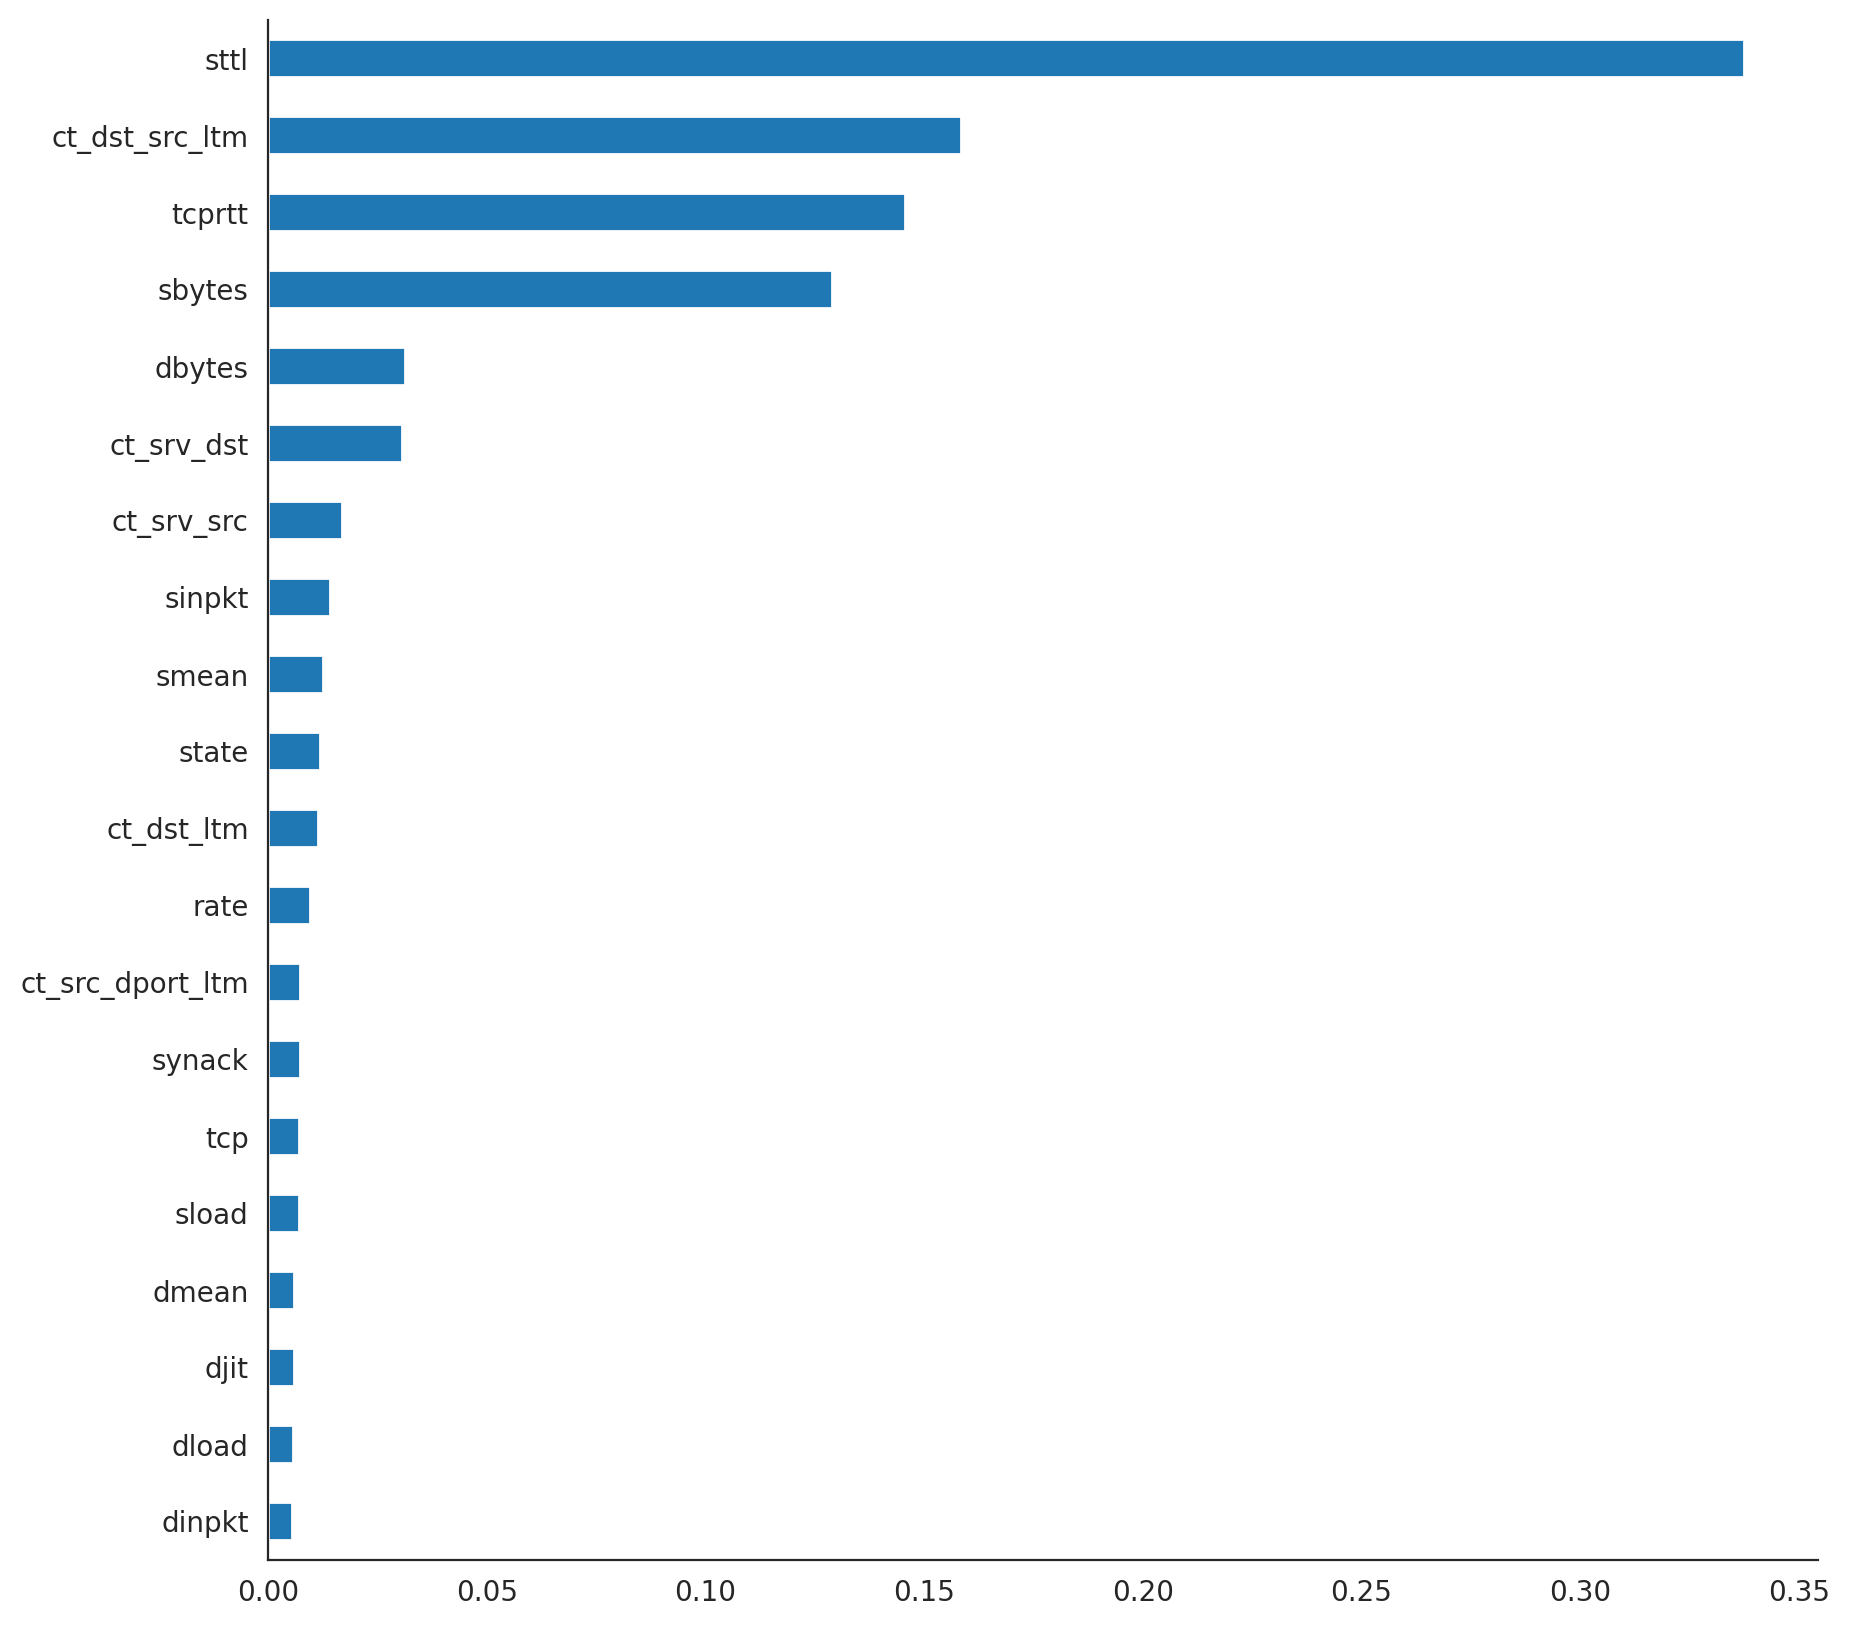

In [41]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [42]:
%%time
from sklearn.ensemble import ExtraTreesClassifier
start = time.time()
model = ExtraTreesClassifier(random_state=0,n_jobs=-1).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 5.69 s, sys: 84.2 ms, total: 5.77 s
Wall time: 7.74 s


In [43]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Extra Trees'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.36%
Recall: 97.36%
Precision: 97.38%
F1-Score: 97.37%
time to train: 7.33 s
time to predict: 0.34 s
total: 7.67 s


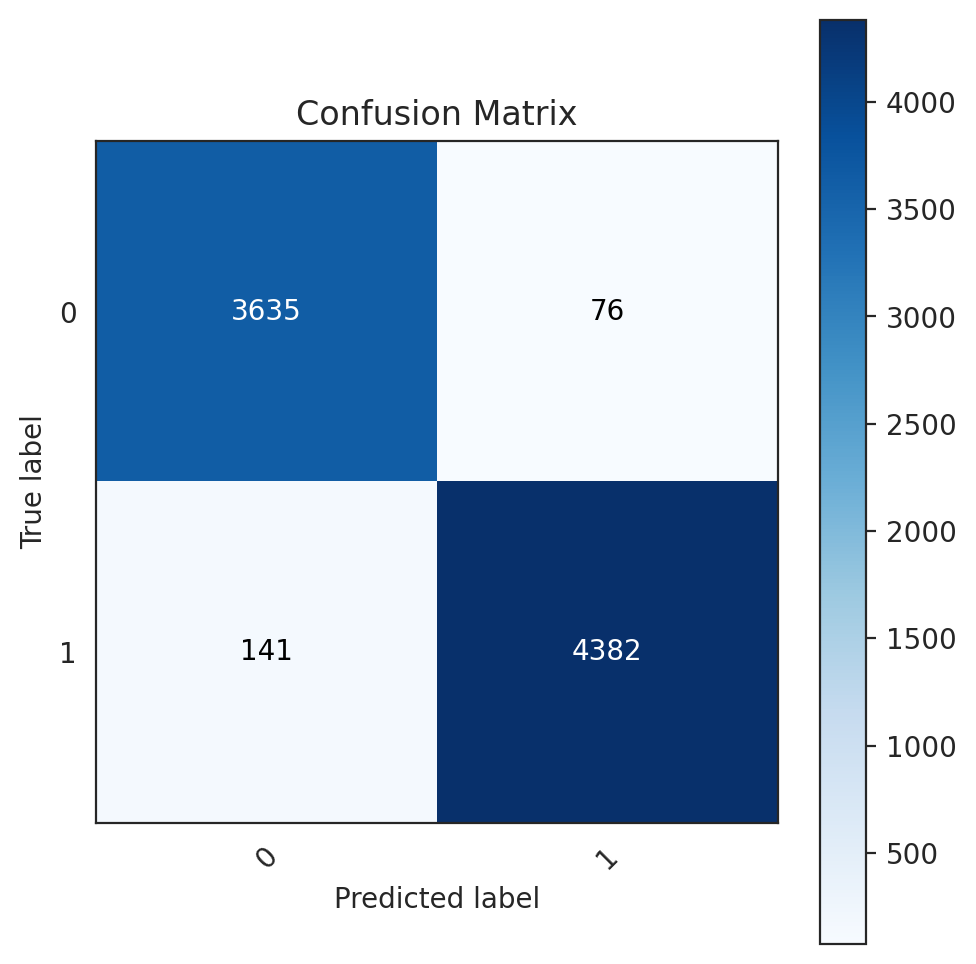

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


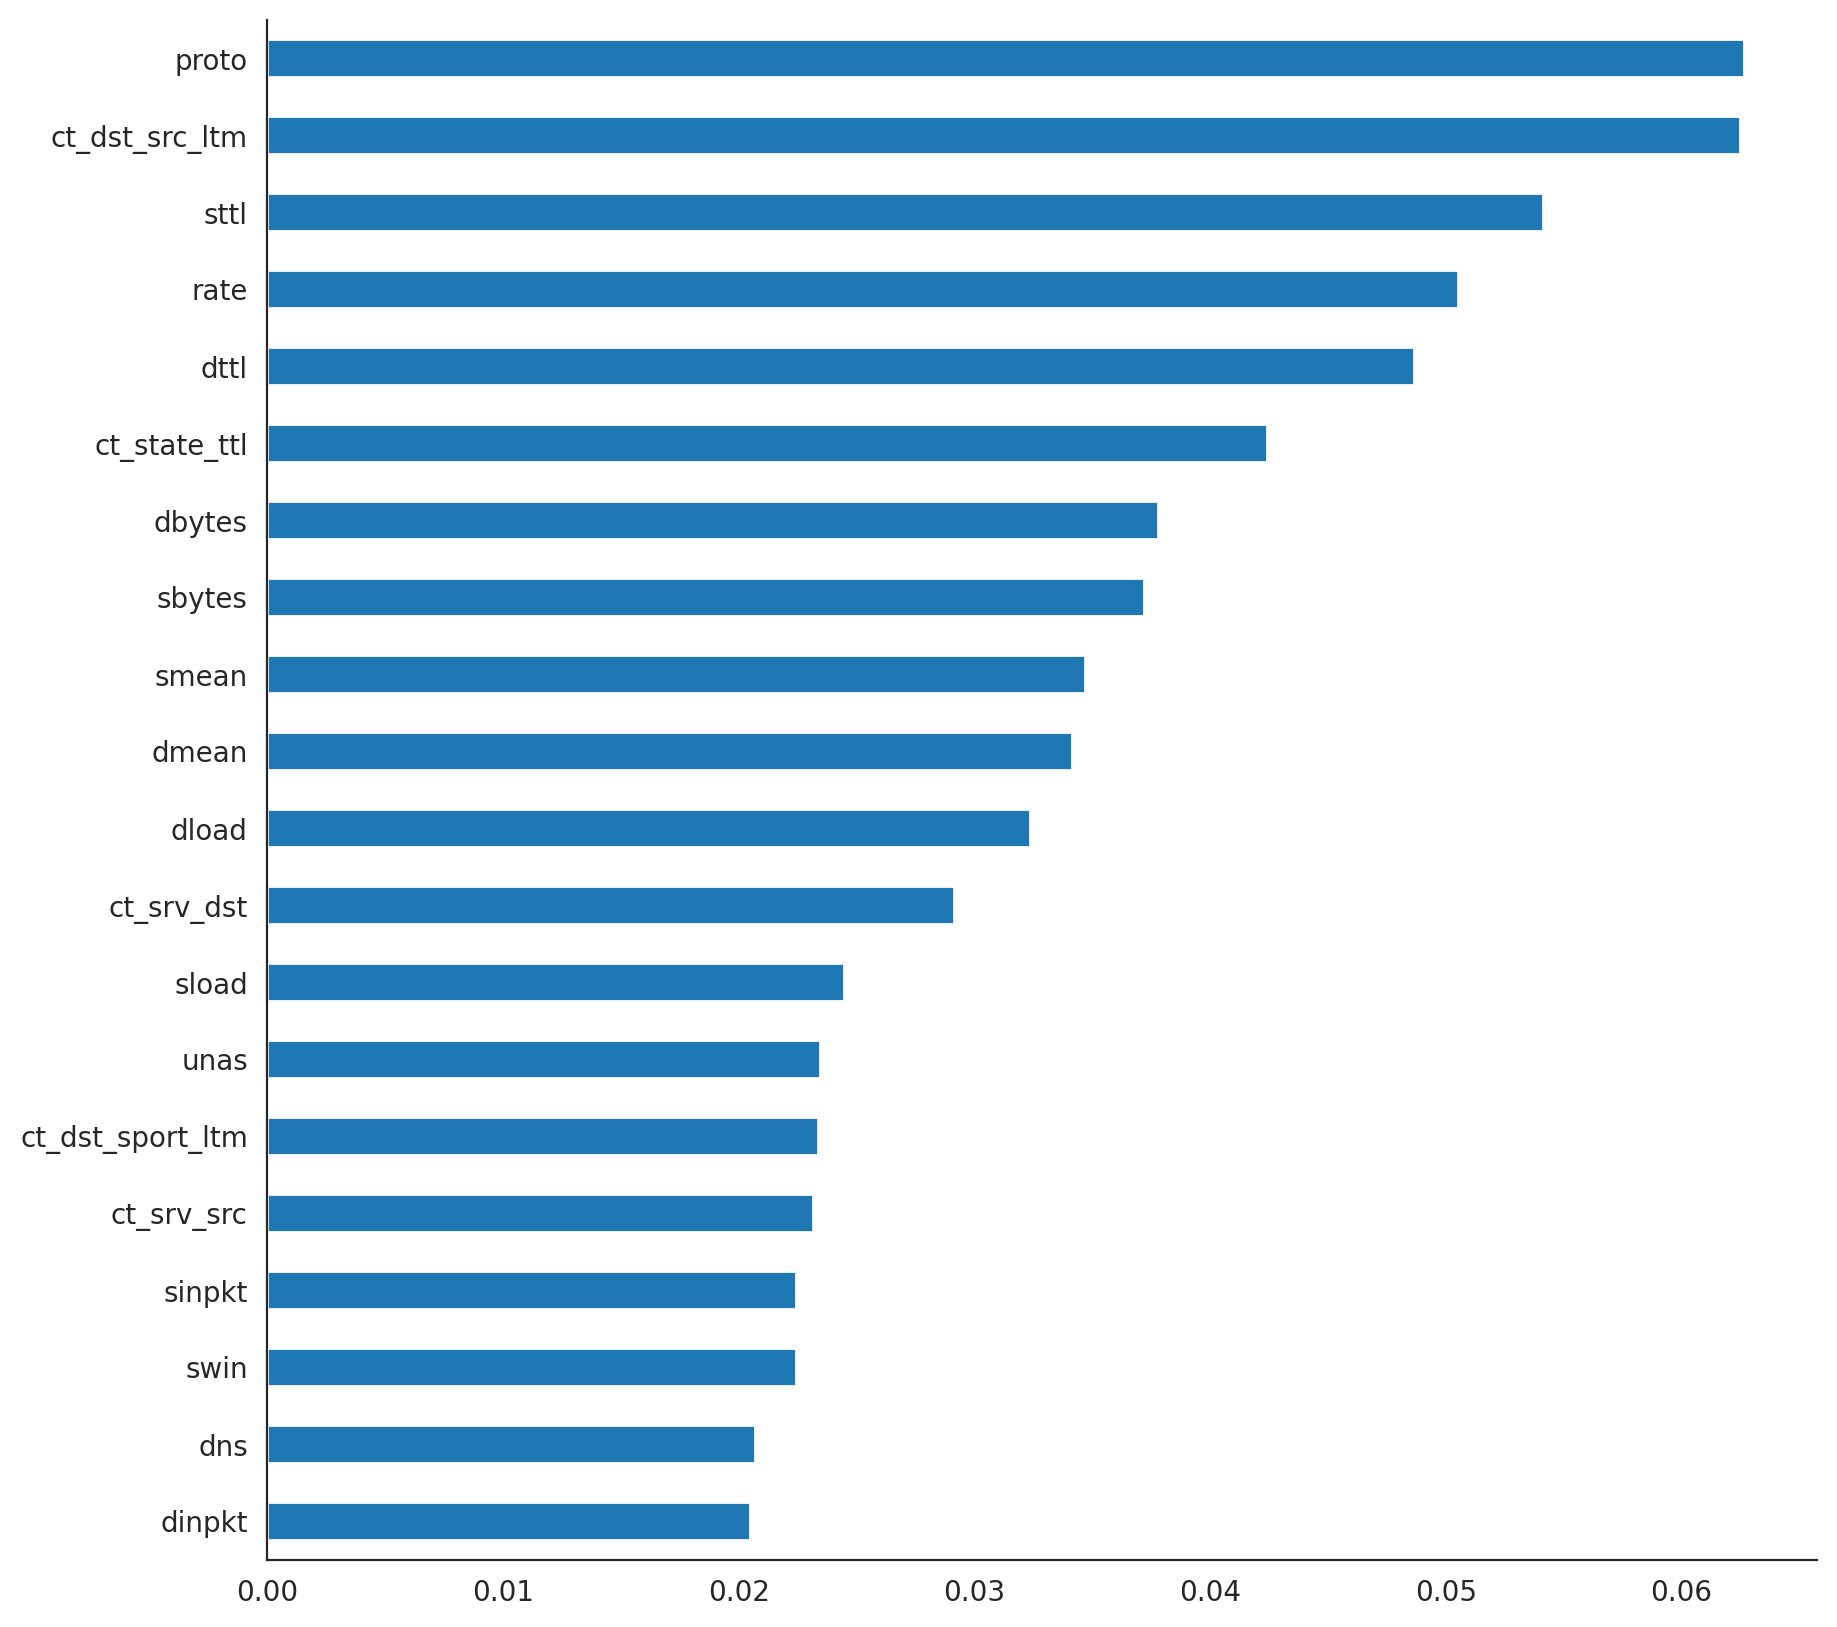

In [45]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
sns.despine()
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [46]:
%%time
from sklearn.ensemble import RandomForestClassifier
start = time.time()
model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 10 s, sys: 76.5 ms, total: 10.1 s
Wall time: 11.5 s


In [47]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 97.60%
Recall: 97.60%
Precision: 97.60%
F1-Score: 97.60%
time to train: 11.02 s
time to predict: 0.45 s
total: 11.47 s


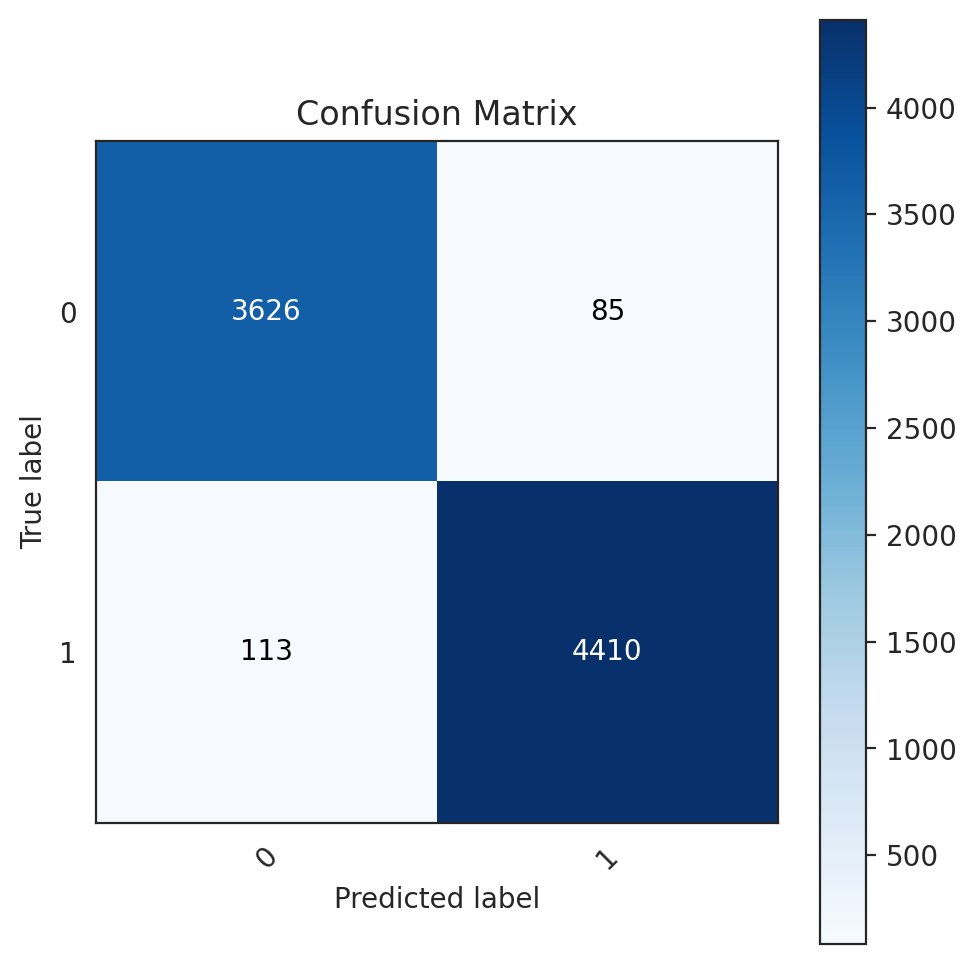

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


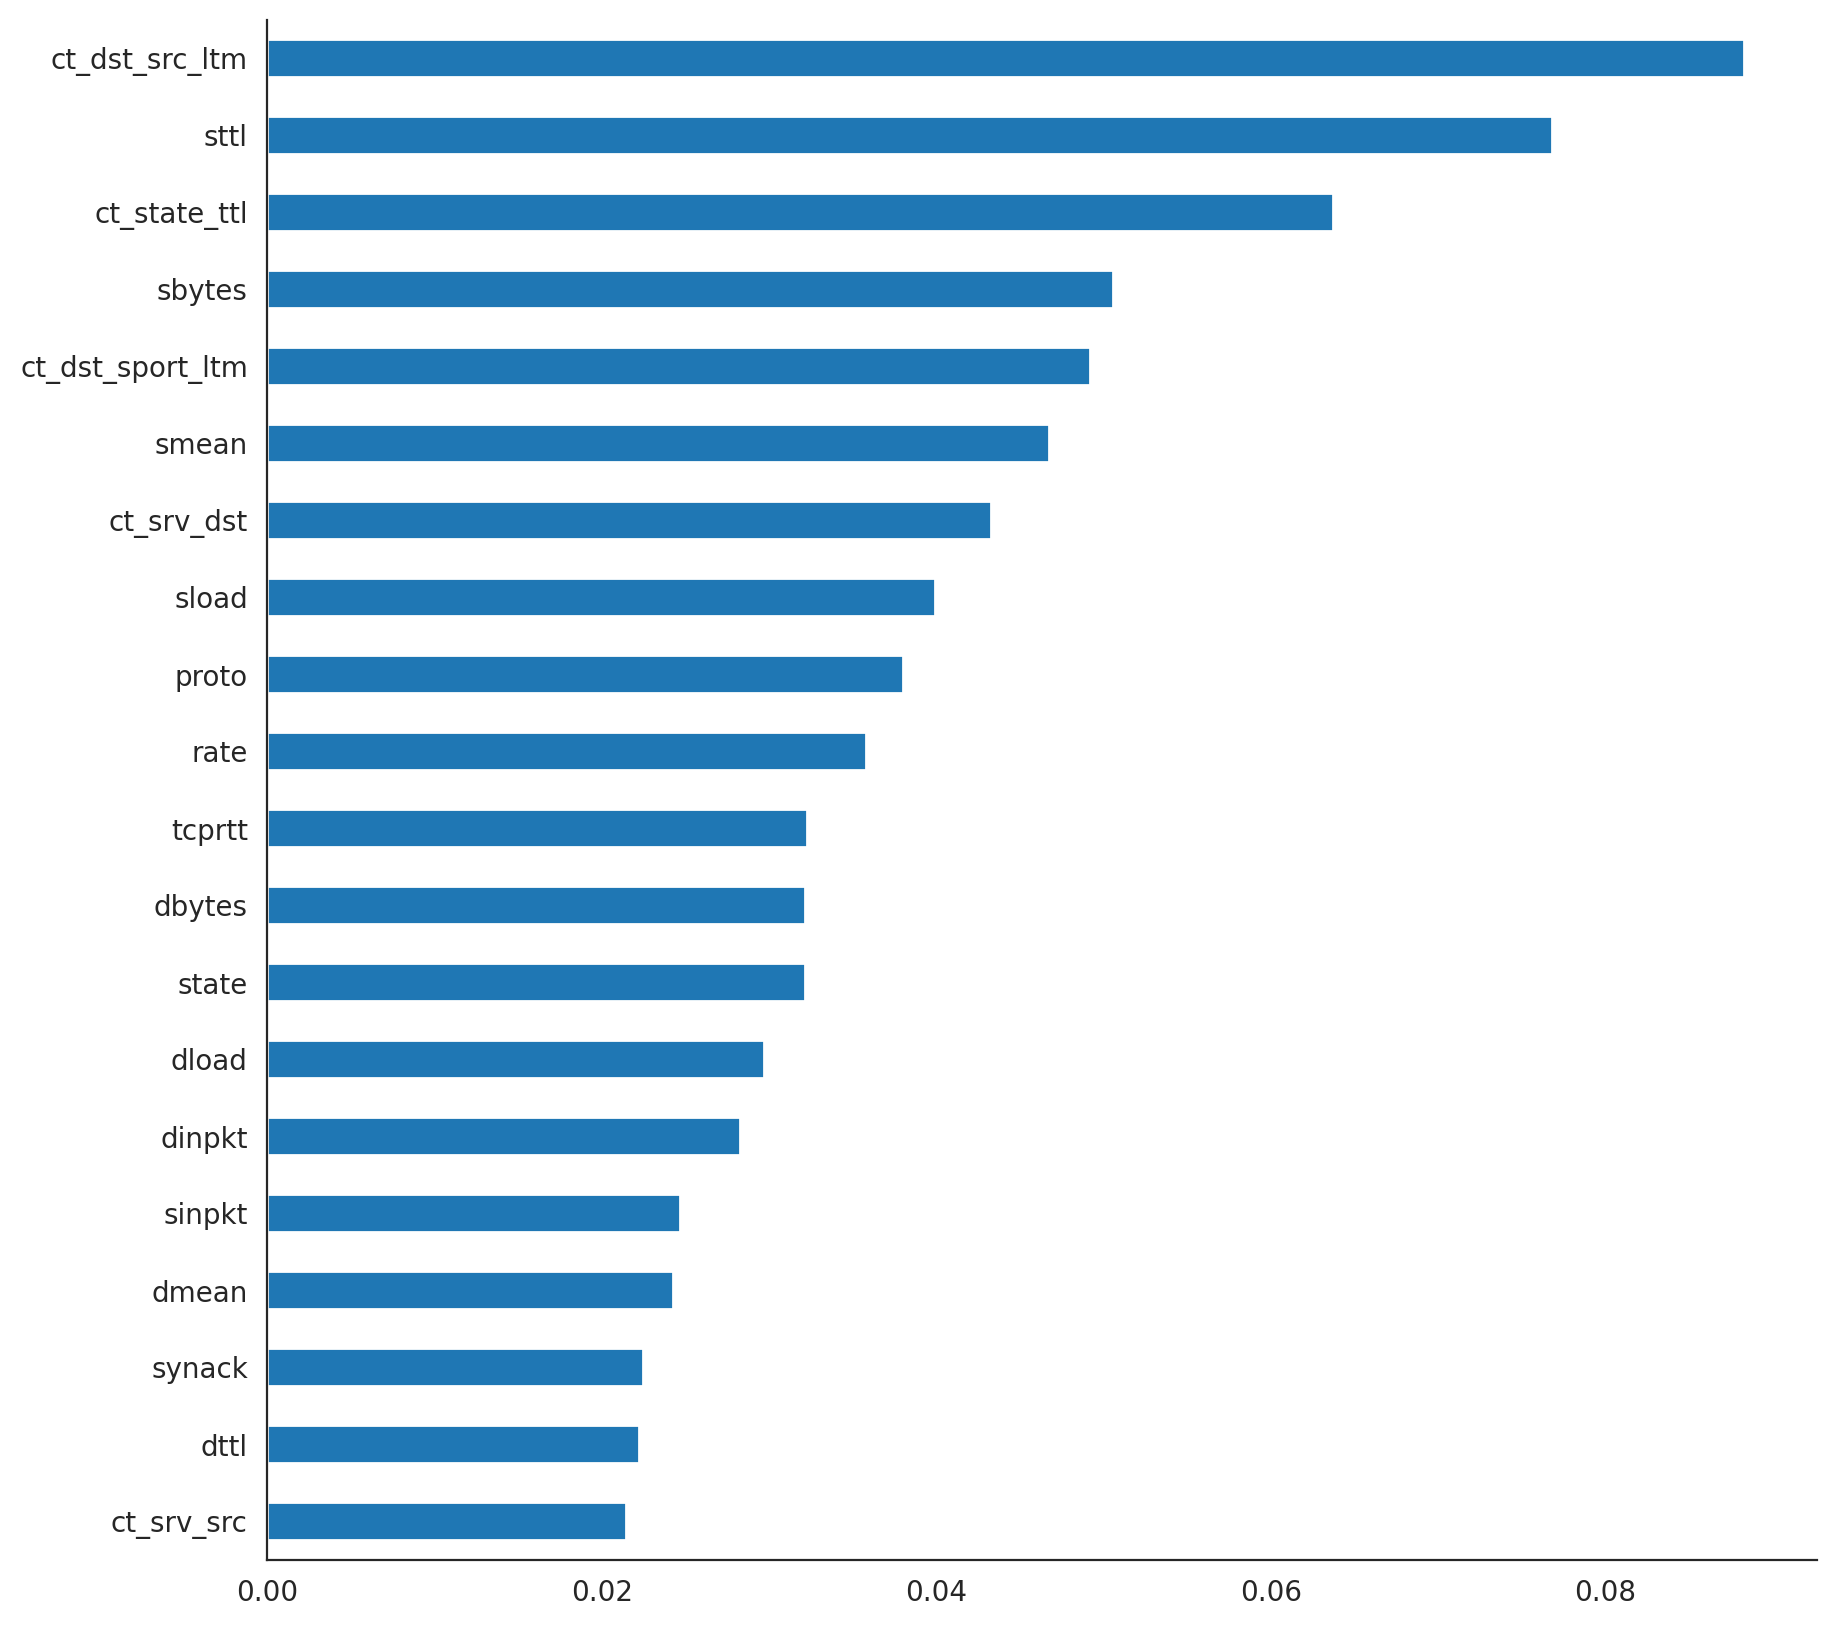

In [49]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [50]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
model = GradientBoostingClassifier().fit(X_train,y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # These are the predictions from the test data.
end_predict = time.time()

CPU times: user 28.8 s, sys: 44.3 ms, total: 28.8 s
Wall time: 38.5 s


In [51]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("time to train: "+ "{:.2f}".format(end_train-start)+" s")
print("time to predict: "+"{:.2f}".format(end_predict-end_train)+" s")
print("total: "+"{:.2f}".format(end_predict-start)+" s")
model_performance.loc['Gradient Boosting Classifier'] = [accuracy, recall, precision, f1s,end_train-start,end_predict-end_train,end_predict-start]

Accuracy: 95.93%
Recall: 95.93%
Precision: 95.93%
F1-Score: 95.93%
time to train: 38.48 s
time to predict: 0.02 s
total: 38.50 s


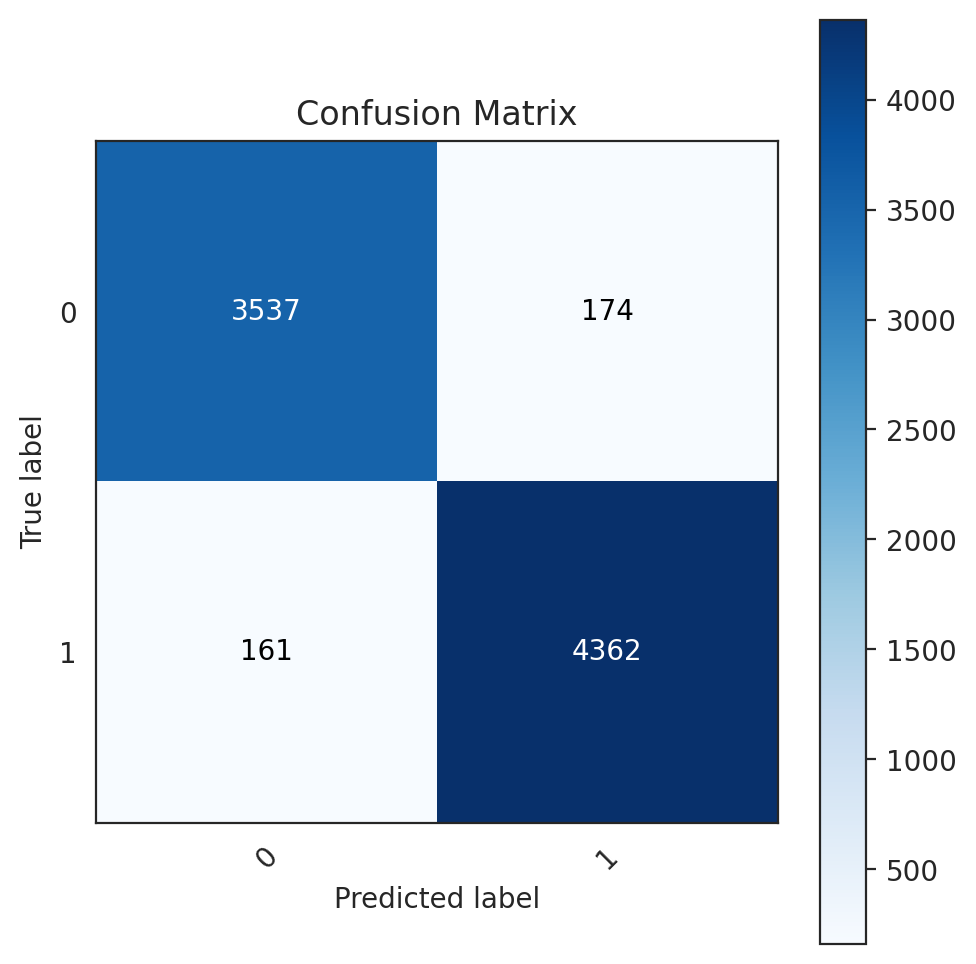

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming 'model', 'X_test', and 'y_test' are defined
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
class_names = [str(i) for i in range(len(np.unique(y_test)))]

plt.rcParams['figure.figsize'] = 5, 5
sns.set_style("white")
plot_confusion_matrix(cm, class_names)
plt.show()


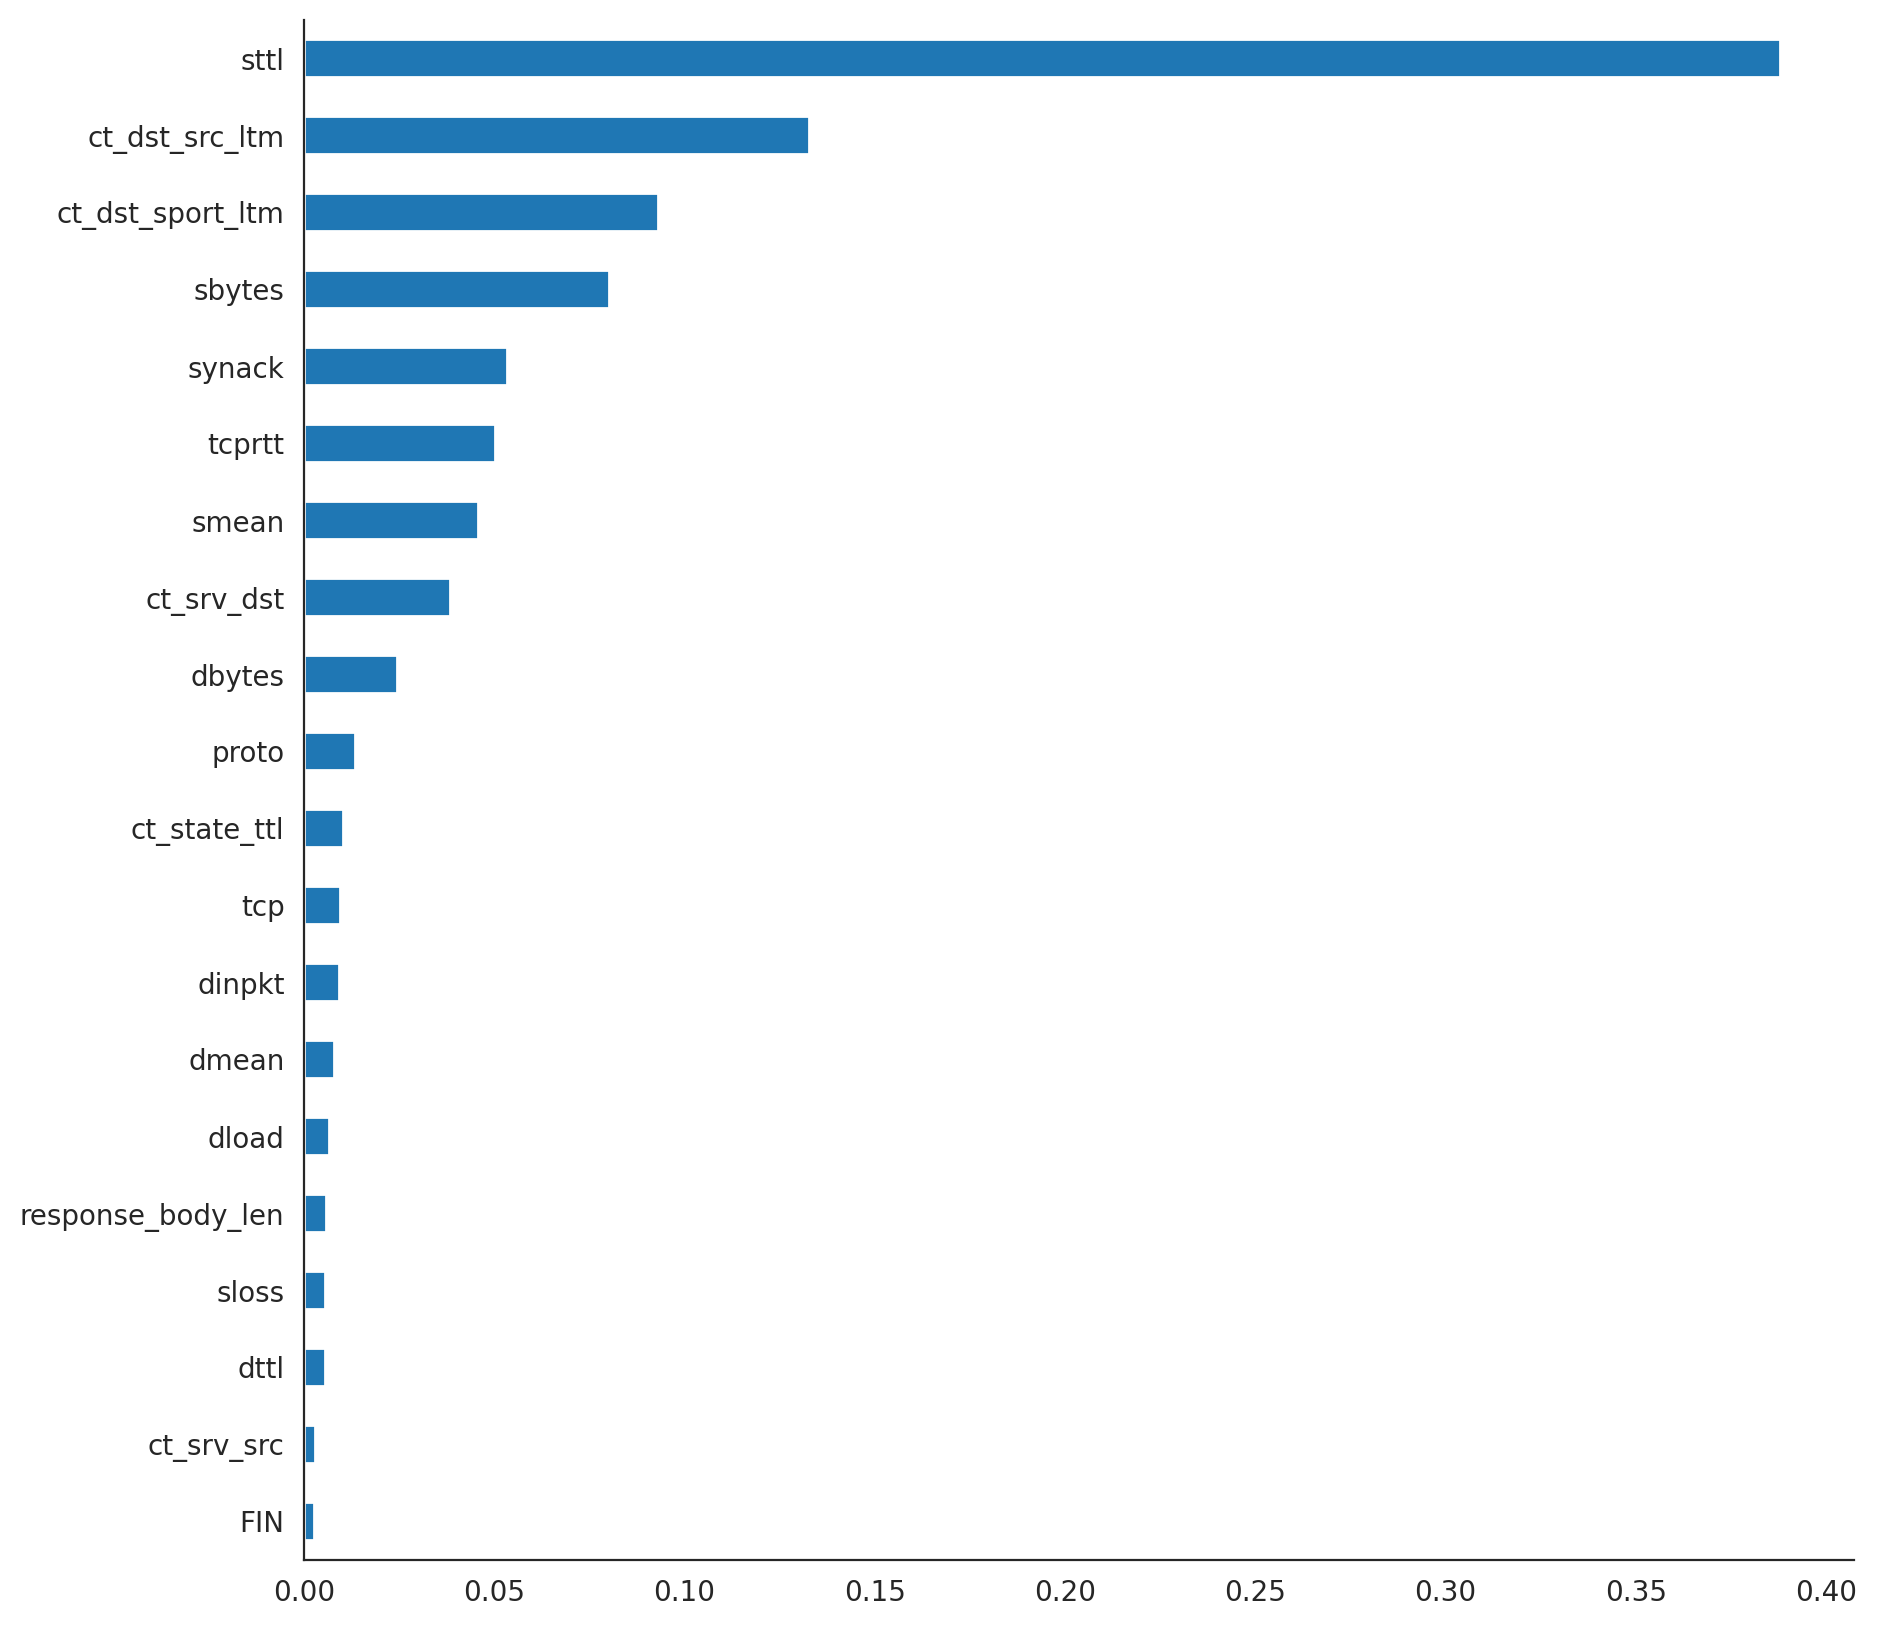

In [53]:
plt.rcParams['figure.figsize']=10,10
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

In [54]:
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })

,Accuracy,Recall,Precision,F1-Score,time to train,time to predict,total time
Logistic,92.47%,92.47%,92.48%,92.47%,1.9,0.0,1.9
kNN,94.56%,94.56%,94.60%,94.56%,0.0,2.3,2.3
Decision Tree,96.28%,96.28%,96.29%,96.28%,0.6,0.0,0.6
Extra Trees,97.36%,97.36%,97.38%,97.37%,7.3,0.3,7.7
Random Forest,97.60%,97.60%,97.60%,97.60%,11.0,0.4,11.5
Gradient Boosting Classifier,95.93%,95.93%,95.93%,95.93%,38.5,0.0,38.5


In [55]:
pip install XlsxWriter


In [56]:
import pandas as pd

# Assuming you have a DataFrame named model_performance

styled_df = model_performance.style.background_gradient(cmap='coolwarm').format({
    'Accuracy': '{:.2%}',
    'Precision': '{:.2%}',
    'Recall': '{:.2%}',
    'F1-Score': '{:.2%}',
    'time to train': '{:.1f}',
    'time to predict': '{:.1f}',
    'total time': '{:.1f}',
})

# Save the styled DataFrame to an Excel file with color codes
output_excel_path = 'Result-FeatureSet1-TrainingSet50.xlsx'
with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
    styled_df.to_excel(writer, sheet_name='Sheet1', index=False)

# Access the xlsxwriter workbook and worksheet objects
workbook = writer.book
worksheet = writer.sheets['Sheet1']

# Get the xlsxwriter Style object from the Pandas Styler
pandas_styler = styled_df.to_excel(writer, sheet_name='Sheet1', index=False)
xf = pandas_styler
df = model_performance

# Use the XlsxWriter `apply()` method to customize the column widths
column_settings = [{'header': column} for column in df.columns]
worksheet.add_table(0, 0, df.shape[0], df.shape[1] - 1, {'columns': column_settings})

for idx, column in enumerate(df.columns):
    series = df[column]
    max_len = max((
        series.astype(str).map(len).max(),  # len of largest item
        len(str(column))  # len of column name/header
        )) + 1  # adding a little extra space

    worksheet.set_column(idx, idx, max_len)  # set column width

    # center align the header cells
    worksheet.write(0, idx, column, xf)

output_excel_path

'Result-FeatureSet1-TrainingSet50.xlsx'